# matplotlib各种图形绘制

## 1. 导入相关包

首先，先引入matplotlib.pyplot简写作plt,再引入模块numpy用来产生一些随机数据。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl
from scipy.stats import norm

# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']# 设置微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False # 避免坐标轴不能正常的显示负号

## 2. 线图：plot()

函数功能：展现变量的变化趋势  
调用方法：plt.plot(x, y, linestyle, linewidth,color,marker, markersize, markeredgecolor, markerfactcolor, label, alpha)  
x：指定折线图的x轴数据；  
y：指定折线图的y轴数据；  
linestyle：指定折线的类型，可以是实线、虚线、点虚线、点点线等，默认文实线；  
linewidth：指定折线的宽度；  
marker：可以为折线图添加点，该参数是设置点的形状；  
markersize：设置点的大小；  
markeredgecolor：设置点的边框色；  
markerfactcolor：设置点的填充色；  
label：为折线图添加标签，类似于图例的作用。  
### 2.1 用plot方法画出x=(0,10)间sin的图像

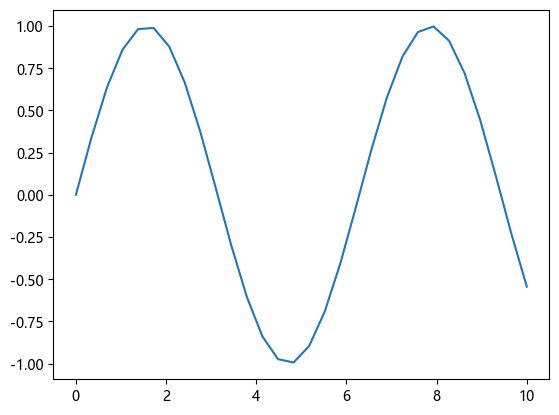

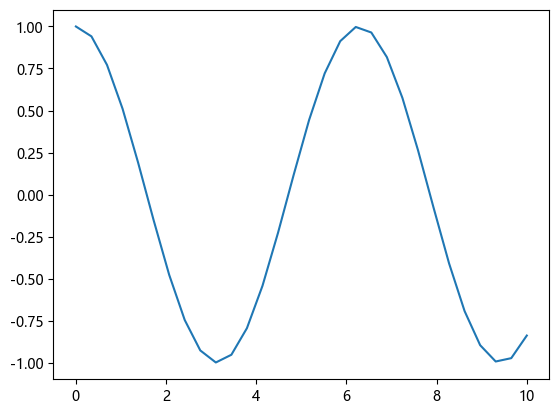

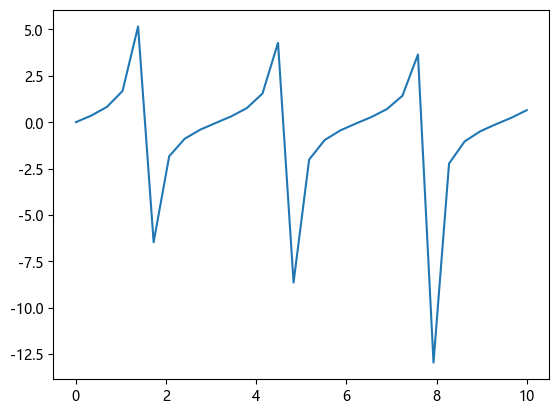

In [3]:
x = np.linspace(0, 10, 30)
plt.plot(x, np.sin(x))
plt.show()

#也可以用相似的代码画出其他的三角函数图形，如cos(x),tan(x)……
plt.plot(x,np.cos(x))
plt.show()

plt.plot(x,np.tan(x))
plt.show()

### 2.2 用点加虚线的方式画出x=(0,10)间sin的图像

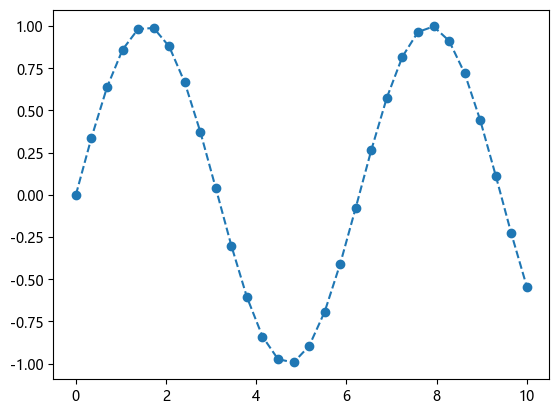

In [4]:
plt.plot(x, np.sin(x), linestyle='--', marker='o') 
plt.show()

### 2.3 同时绘制cos和sin图像在同一图中
两条线的要求如下：  
sin曲线：蓝色，实线，'+'号表示；  
cos曲线：绿色，虚线，'*'号表示；  

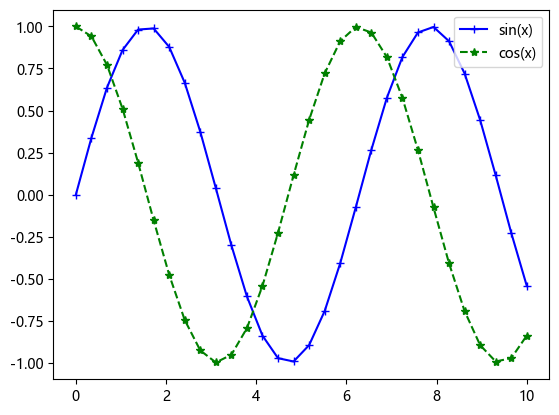

In [5]:
plt.plot(x, np.sin(x), color='b', linestyle='-', marker='+', label='sin(x)')  #或'b-+'
plt.plot(x, np.cos(x), color='g', linestyle='--', marker='*', label='cos(x)') #或'g--*'
plt.legend(loc='upper right')
plt.show()

# fmt：6种组合
# [color][marker][line],3种任意组合为6种可能,每个都是可选的,每个属性可以选择写或者不写,而且与组合中它们所在的位置顺序无关;


### 2.4 绘制折线图

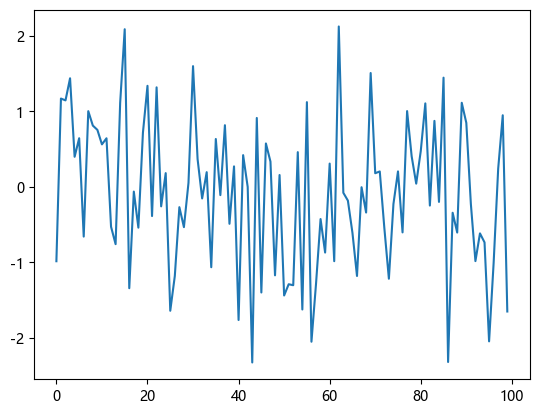

In [6]:
y = np.random.randn(100)
x = np.arange(100)
plt.plot(x,y)
plt.show()

## 3. 散点图

函数功能：散点图，寻找变量之间的关系  
调用方法：plt.scatter(x, y, s, c, marker, cmap, norm, alpha, linewidths, edgecolorsl)  
参数说明：  
x: x轴数据  
y: y轴数据  
s: 散点大小  
c: 散点颜色  
marker: 散点图形状  
cmap: 指定某个colormap值,该参数一般不用，用默认值  
alpha: 散点的透明度  
linewidths: 散点边界线的宽度  
edgecolors: 设置散点边界线的颜色  
### 3.1 绘制两组100个随机数的散点图

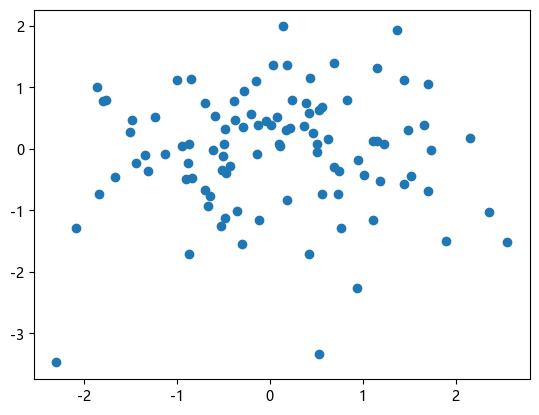

In [7]:
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x,y)
plt.show()

### 3.2 增加颜色，大小，透明度设置 -- 气泡图

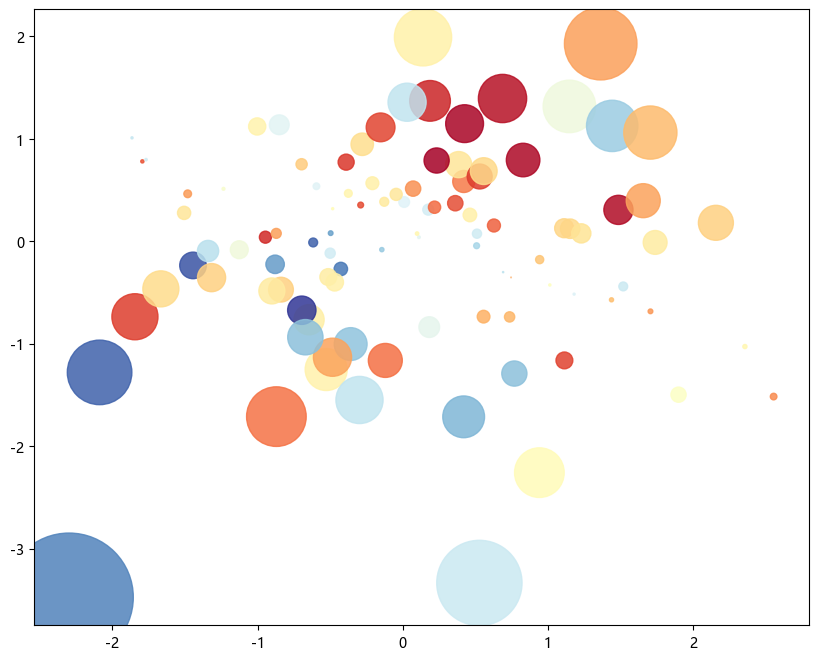

In [8]:
#创建画布，并设置画布大小
plt.figure(figsize = (10,8))

#设置颜色
colors = np.random.randn(100)

plt.scatter(x,y,
            #大小
            s = np.power(10*x +20*y,2),
            #颜色
            c = colors,
            #标注
            marker = 'o',
            #指定某个colormap值
            cmap=mpl.cm.RdYlBu, #这个可以不指定
            #透明度
            alpha = 0.85)
plt.show()

### 3.3 散点图分三类并显示图例

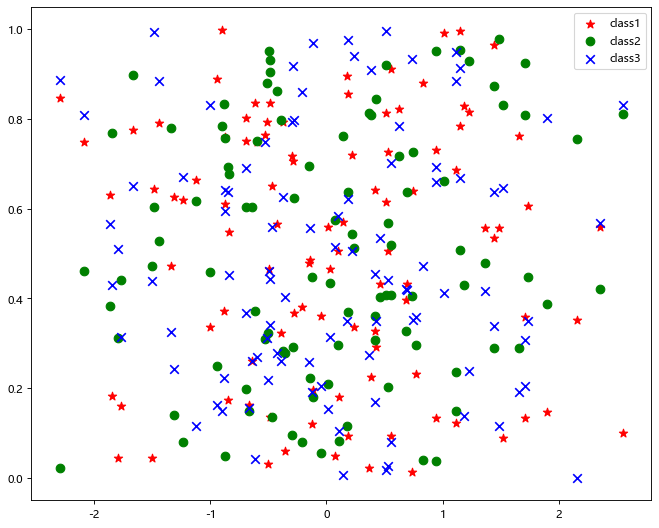

In [9]:
#设置画布大小
plt.figure(figsize=(10,8),dpi=80)

colors = ['r','g','b'] #设置颜色
markers = ['*','o','x'] #设置标注，与上面颜色设置一一对应

for i in range(0,3):
    y = np.random.rand(100)
    plt.scatter(x,y,s=60,c=colors[i],marker=markers[i])
plt.legend(['class1','class2','class3'],loc='best')

plt.show()


## 4. 条形图：bar(), barh()

条形图实际上是用来表示分组（或离散）变量的可视化，可以使用matplotlib模块中的bar函数完成条形图的绘制。  
函数功能：散点图，寻找变量之间的关系  
调用方法：plt.bar(x, y, width，color, edgecolor, bottom, linewidth, align, tick_label, align)  
参数说明：  
x：指定x轴上数值  
y：指定y轴上的数值  
width：表示条形图的宽度，取值在0~1之间，默认为0.8  
color：条形图的填充色  
edgecolor：条形图的边框颜色  
bottom：百分比标签与圆心距离  
linewidth：条形图边框宽度  
tick_label：条形图的刻度标签  
align：指定x轴上对齐方式，"center","lege"边缘  
### 4.1 简单垂直条形图

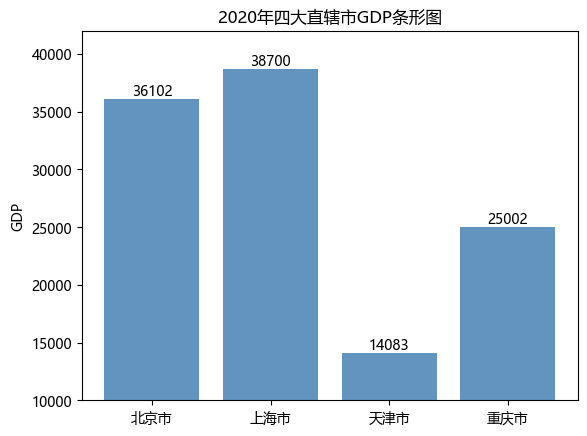

In [10]:
#2020年四大直辖市GDP水平
GDP = [36102,38700,14083,25002]
city = ['北京市','上海市','天津市','重庆市']
plt.bar(city,GDP,align='center',color='steelblue',alpha=0.85)
plt.ylabel('GDP')
plt.title('2020年四大直辖市GDP条形图')
plt.ylim([10000,42000])

#为每个条形图添加对应的数据标签，ha='center'
#用遍历的方式
for x,y in enumerate(GDP):
    plt.text(x,y+300,"%s"%y,ha='center') #ha='center'表示数据的标签放在中间,y+300表示，在原来height增加300

### 4.2 简单水平条形图

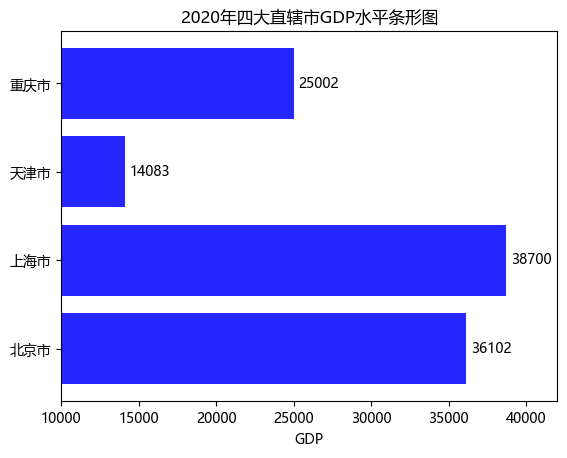

In [11]:
#水平条形图
#bar:指竖值方向的条形图，barh：指水平方向的条形图,h:horizontal
plt.barh(city,GDP,align='center',color='blue',alpha=0.85)
plt.xlabel('GDP')
plt.title('2020年四大直辖市GDP水平条形图')
plt.xlim([10000,42000])

#为每个条形图添加数值标签：va='center',va:表示数据标签是竖直方向的
#同样是遍历
for x,y in enumerate(GDP):
    plt.text(y+300,x,'%s'%y,va='center')

plt.show()

水平条形图的绘制与垂直条形图的绘制步骤一致，只是调用了barh函数来完成。需要注意的是，条形图的数值标签设置有一些不一样，需要将标签垂直居中显示，使用va参数即可
### 4.3 簇状条形图

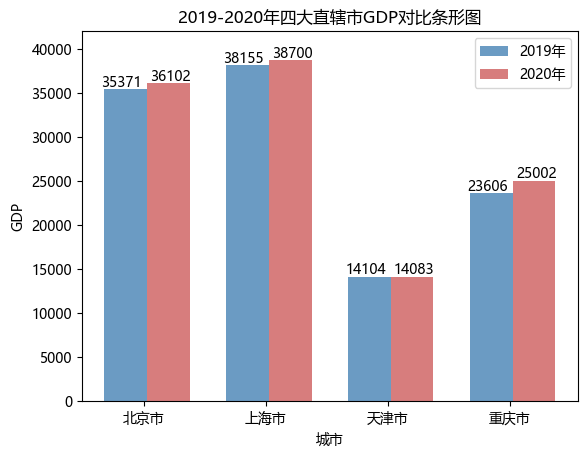

In [12]:
#2019-2020年四大直辖市GDP对比条形图
GDP_2019 = [35371, 38155, 14104, 23606]
GDP_2020 = [36102, 38700, 14083, 25002]
bar_width = 0.35

# 绘图
plt.bar(np.arange(4), GDP_2019, label = '2019年', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(np.arange(4) + bar_width, GDP_2020, label = '2020年', color = 'indianred', alpha = 0.8, width = bar_width)

# 添加轴标签
plt.xlabel('城市')
plt.ylabel('GDP')
plt.title('2019-2020年四大直辖市GDP对比条形图')

#增加刻度标签
plt.xticks(np.arange(4)+0.15, city)

#设置y轴的刻度范围
plt.ylim([0, 42000])

# 为每个条形图添加数值标签
for x2019, y2019 in enumerate(GDP_2019):
    plt.text(x2019-0.2, y2019+300, '%s' %y2019)
for x2020,y2020 in enumerate(GDP_2020):
    plt.text(x2020+0.2, y2020+300, '%s' %y2020)

#显示图例
plt.legend(loc='best')

plt.show()


### 4.4 堆叠条形图

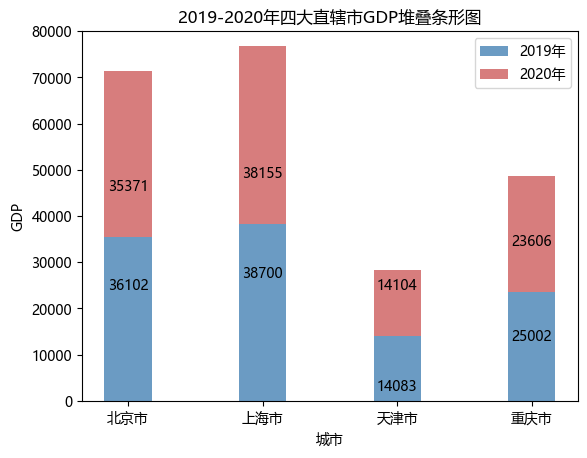

In [13]:
#将上面簇状条形图转换成堆叠条形图

# 绘图
plt.bar(city, GDP_2019, label = '2019年', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(city, GDP_2020, label = '2020年', color = 'indianred', alpha = 0.8, width = bar_width, bottom=GDP_2019) #记得设置哪个在bottom哪个在top


# 添加轴标签
plt.xlabel('城市')
plt.ylabel('GDP')
plt.title('2019-2020年四大直辖市GDP堆叠条形图')

#设置y轴的刻度范围
plt.ylim([0, 80000])

# 为每个条形图添加数值标签
for x2019, y2019 in enumerate(GDP_2019):
    plt.text(x2019-0.15, y2019 + 10000, '%s' %y2019) #堆叠条形图数据标签在中间，数据标签位置要做改变，例如： y2019 + 10000
for x2020,y2020 in enumerate(GDP_2020):
    plt.text(x2020-0.15, y2020 - 12000, '%s' %y2020)

#显示图例
plt.legend(loc='upper right')

plt.show()

## 5. 箱线图：barplot()

函数功能：反映数据的异常情况；主要用于分析数据内部的分布状态或分散状态，包括上下限、各分位数、异常值；  
调用方法：plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None)  
参数说明：  
x：指定要绘制箱线图的数据；  
notch：是否是凹口的形式展现箱线图，默认非凹口；  
sym：指定异常点的形状，默认为+号显示；  
vert：是否需要将箱线图垂直摆放，默认垂直摆放；  
whis：指定上下须与上下四分位的距离，默认为1.5倍的四分位差；  
positions：指定箱线图的位置，默认为[0,1,2…]；  
widths：指定箱线图的宽度，默认为0.5；  
patch_artist：是否填充箱体的颜色；  
meanline：是否用线的形式表示均值，默认用点来表示；  
showmeans：是否显示均值，默认不显示；  
showcaps：是否显示箱线图顶端和末端的两条线，默认显示；  
showbox：是否显示箱线图的箱体，默认显示；  
showfliers：是否显示异常值，默认显示；  
boxprops：设置箱体的属性，如边框色，填充色等；  
boxprops = {'color':'g', 'facecolor':'yellow'}  
'color' : 'g' 箱子外框的颜色；  
'facecolor' : 'yellow' 箱子填充的颜色；  
labels：为箱线图添加标签，类似于图例的作用；  
flierprops：设置异常值的属性，如异常点的形状、大小、填充色等；  
medianprops：设置中位数的属性，如线的类型、粗细等；  
meanprops：设置均值的属性，如点的大小、颜色等；  
capprops：设置箱线图顶端和末端线条的属性，如颜色、粗细等；  
whiskerprops：设置须的属性，如颜色、粗细、线的类型等；  
### 5.1 绘制箱线图


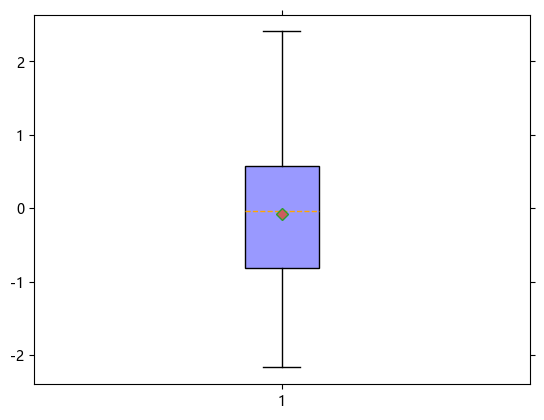

In [14]:
#利用numpy库生成100个服从标准正态分布随机数
x = np.random.normal(0,1,100)

plt.boxplot(x,#指定绘图数据
            patch_artist = True, # 要求用自定义颜色填充盒形图，默认填充白色
            showmeans = True, #以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, #设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},#设置异常属性，点的形状，填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'},#设置均值点的属性，点的形状，填充色
            medianprops = {'linestyle':'--','color':'orange'}) #设置中位数线的属性，线的类型和颜色

#取出箱线图的上边框和有边框的刻度标签
plt.tick_params(top = 'off',right = 'off')

plt.show()


### 5.2 绘制不同分组的箱线图

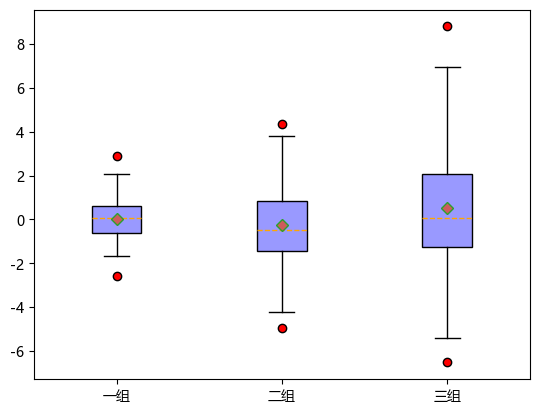

In [15]:
#利用 numpy库生成三组正态分布随机数
x = [np.random.normal(0,std,100) for std in range(1,4)]

#绘图
plt.boxplot(x,#数据
            patch_artist = True,#是否填充箱体的颜色，默认是填充的
            labels = ['一组','二组','三组'],#添加具体的标签名称
            showmeans = True,#是否显示均值，默认是显示的
            boxprops = {'color':'black','facecolor':'#9999ff'},#设置箱体的属性，如线框颜色和填充色颜色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},#设置异常点的属性，如标记以及标记的颜色
            meanprops = {'marker':'D','markerfacecolor':'indianred'},#设置均值的属性，均值默认是以点呈现的
            medianprops = {'linestyle':'--','color':'orange'}) #设置中位值的属性)
plt.show()

## 6. 饼图：pie()

函数功能：表示离散变量各水平占比情况  
调用方法：plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False)  
参数说明：  
x：指定绘图的数据  
explode：指定饼图某些部分的突出显示，即呈现爆炸式；  
labels：为饼图添加标签说明，类似于图例说明；  
colors：指定饼图的填充色；  
autopct：自动添加百分比显示，可以采用格式化的方法显示；  
pctdistance：设置百分比标签与圆心的距离；  
shadow：是否添加饼图的阴影效果；  
labeldistance：设置各扇形标签（图例）与圆心的距离；  
startangle：设置饼图的初始摆放角度；  
radius：设置饼图的半径大小；  
counterclock：是否让饼图按逆时针顺序呈现；  
wedgeprops：设置饼图内外边界的属性，如边界线的粗细、颜色等；  
textprops：设置饼图中文本的属性，如字体大小、颜色等；  
center：指定饼图的中心点位置，默认为原点；  
frame：是否要显示饼图背后的图框，如果设置为True的话，需要同时控制图框x轴、y轴的范围和饼图的中心位置。  
### 6.1 绘制最简单的饼图

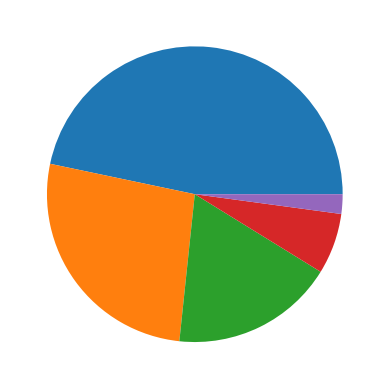

In [16]:
x = [9823, 5601, 3759, 1400, 450]
plt.pie(x)
plt.show()

### 6.2 为饼图添加一些参数

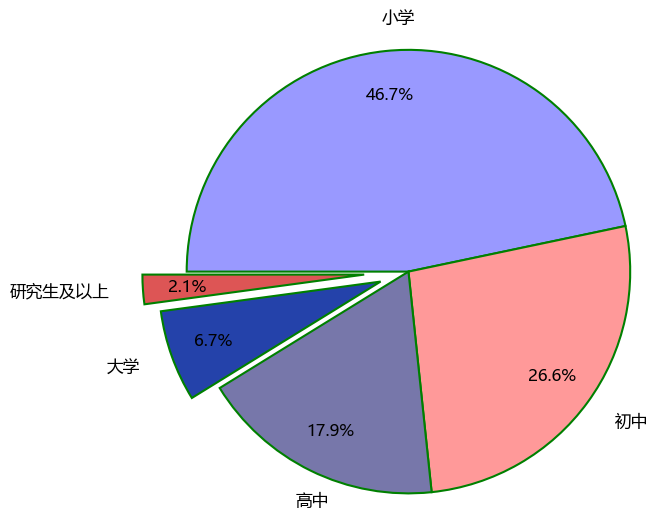

In [17]:
#构造数据：某城镇受教育程度
education = [9823, 5601, 3759, 1400, 450]
labels = ['小学', '初中', '高中', '大学', '研究生及以上']

explode = [0,0,0,0.2,0.3]  # 用于突出显示特定人群
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555'] # 自定义颜色

# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal') #equal是相等的意思，已经就是坐标原定到坐标轴的任意一点都是相等的

#绘制饼图
plt.pie(x = education,#数据
        explode = explode,#突出显示特定人群
        labels=labels,#添加教育水平标签
        colors=colors,#设置pie自定义填充颜色
        autopct='%.1f%%',#设置百分比的格式，这里保留以为小数
        pctdistance=0.8,#设置百分比标签与圆心的距离
        labeldistance=1.15, #设置教育水平与标签与圆心的距离
        startangle=180,#设置饼图的初始角度
        radius=1.5,#设置饼图的半径
        counterclock=False,#是否为逆时针，这里是顺时针
        wedgeprops = {'linewidth':1.5,'edgecolor':'green'},#设置内外边界的属性
        textprops = {'fontsize':12,'color':'k'},#设置文本标签的属性
        center = (1.8,1.8),#设置饼图的原点
        frame=0) #是否显示饼图的图框，这里不显示

# 删除x轴和y轴的刻度
# plt.xticks(())
# plt.yticks(())

plt.show()

## 7. 直方图和密度图：hist()
函数功能：判定数据的分布情况  
调用方法：plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)  
参数说明：  
x：指定要绘制直方图的数据；  
bins：指定直方图条形的个数；  
range：指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；  
density：是否将直方图的频数转换成频率；  
weights：该参数可为每一个数据点设置权重；  
cumulative：是否需要计算累计频数或频率；  
bottom：可以为直方图的每个条形添加基准线，默认为0；  
histtype：指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’, ‘stepfilled’；  
align：设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；  
orientation：设置直方图的摆放方向，默认为垂直方向；  
rwidth：设置直方图条形宽度的百分比；  
log：是否需要对绘图数据进行log变换；  
color：设置直方图的填充色；  
label：设置直方图的标签，可通过legend展示其图例；  
stacked：当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放。  
### 7.1 绘制简单频数直方图

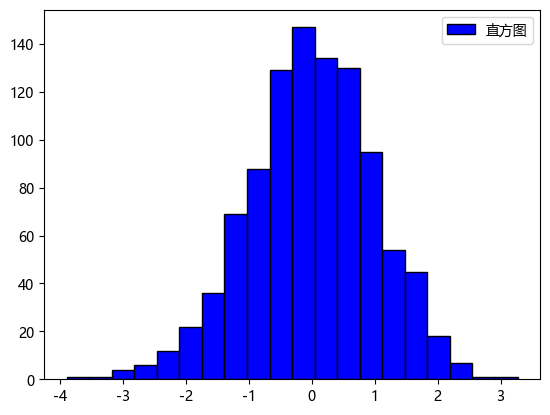

In [18]:
#准备数据
data = np.random.randn(1000)

#绘图
plt.hist(data,#绘图数据
         bins = 20,#指定直方图的条形数为20个
         color = 'blue',#指定填充颜色
         edgecolor = 'k',#指定直方图的边框颜色
         label = '直方图')#为直方图呈现标签

# 去除图形顶部边界和有边界的刻度
# plt.tick_params(top = 'off',right='off')
# 显示图例
plt.legend()
# 显示图形
plt.show()

### 7.2 绘制累计频率直方图

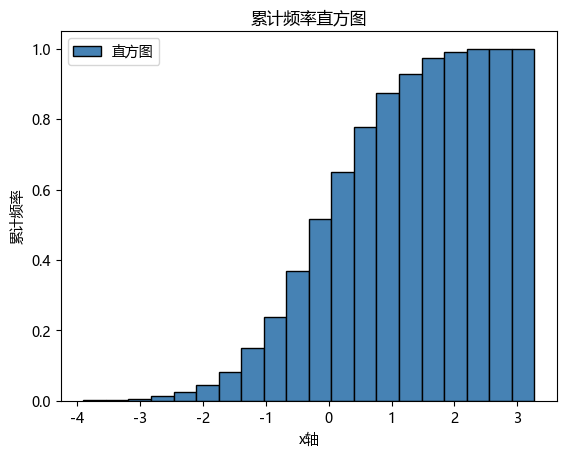

In [19]:
plt.hist(data, # 绘图数据
        bins = 20, # 指定直方图的组距
        density = True, # 设置为频率直方图
        cumulative = True, # 积累直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图')# 为直方图呈现标签

# 设置坐标轴标签和标题
plt.title('累计频率直方图')
plt.xlabel('x轴')
plt.ylabel('累计频率')

# 去除图形顶部边界和右边界的刻度
# plt.tick_params(top='off', right='off') #这里可以不用写，写了反而会显示刻度

# 显示图例
plt.legend(loc = 'best')
# 显示图形
plt.show()

### 7.3 在直方图基础上，添加正态分布曲线和核密度曲线

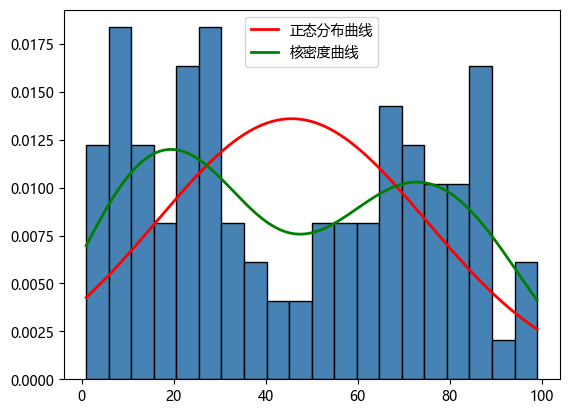

In [20]:
#设置随机种子
np.random.seed(1) #作用，保持生成的随机数不变

#随机生成100个1-100之间的整数
data = np.random.randint(1, 100, 100)

# 正态分布图
plt.hist(data, # 绘图数据
        bins = 20, # 指定直方图的组距
        density = True, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

# 生成正态曲线的数据
x1 = np.linspace(data.min(), data.max(), 1000)
normal = norm.pdf(x1, data.mean(), data.std())
# 绘制正态分布曲线
line1, = plt.plot(x1, normal, 'r-', linewidth = 2) 

# 生成核密度曲线的数据
kde = mlab.GaussianKDE(data)
x2 = np.linspace(data.min(), data.max(), 1000)
# 绘制核密度曲线
line2, = plt.plot(x2,kde(x2), 'g-', linewidth = 2)

# 显示图例
plt.legend([line1, line2], ['正态分布曲线','核密度曲线'], loc='best')

# 显示图形
plt.show()

### 7.4 绘制堆叠直方图

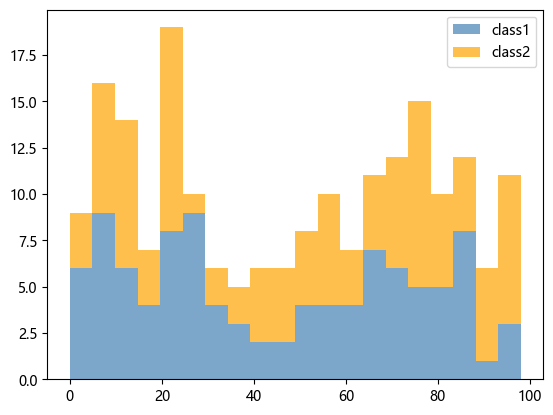

In [21]:
#设置随机种子
np.random.seed(1)

#利用 numpy库生成两组随机数
data = [np.random.randint(0, 100, 100) for i in range(1,3)]#range是左闭右开

# 绘制堆叠直方图
plt.hist(data, bins = 20, label = ['class1', 'class2'], color = ['steelblue','orange'], alpha = 0.7, stacked = True)

# 显示图例
plt.legend()
# 显示图形
plt.show()


## 8. 多图合并显示：subplot()和subplots()

1.在一张画布上输出多个图形,在Matplotlib库中有当前的图形（figure）以及当前轴（axes）概念  
2.其对应的就是当前画布以及当前子图，在一张画布（figure）上可以绘制多个子图（axes）  
3.绘制多图通常采用subplot()函数或subplots()函数  
(1)subplot()函数，通常含有三个参数，子图的行数、列数以及第几个子图  
不足：每次在新的子图上画图时，都得调用subplot()函数  
(2)subplots()函数,一次性就生成多个子图  
set_title()函数 子图中设置子图标题  
set_xlabel()函数 子图中设置X轴标签  
set_ylabel()函数 子图中设置Y轴标签  
### 8.1 subplot()函数多次绘制多图

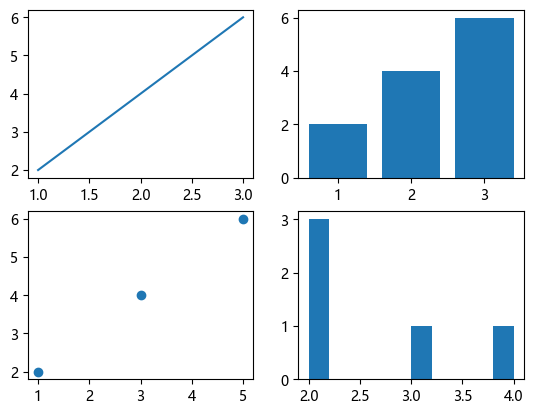

In [22]:
# 绘制第一个子图：折线图
ax1 = plt.subplot(221)  # 221:两行，两列，第一个子图
plt.plot([1, 2, 3], [2, 4, 6])
# 绘制第二个子图：柱状图
ax2 = plt.subplot(222)  # 同上，下面的也是同上
plt.bar([1, 2, 3], [2, 4, 6])
# 绘制第三个子图：散点图
ax3 = plt.subplot(223)  
plt.scatter([1, 3, 5], [2, 4, 6])
# 绘制第四个子图：直方图
ax4 = plt.subplot(224)
plt.hist([2, 2, 2, 3, 4]);

### 8.2 不同画布分开绘制

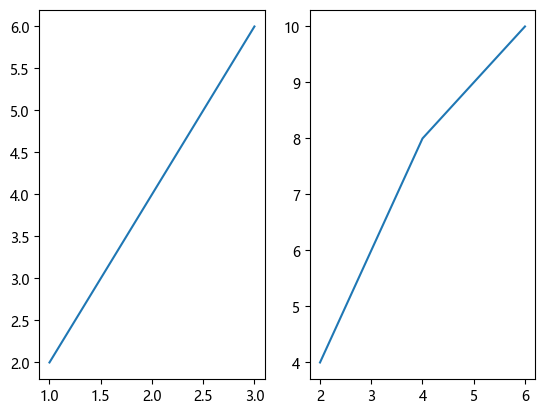

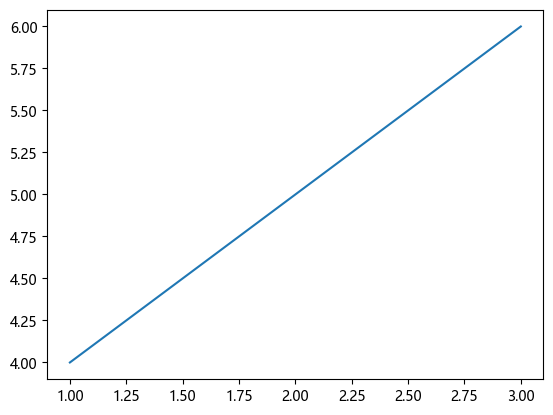

In [23]:
# 第一张画布
plt.figure(1) #figure(1)表示画布1
ax1 = plt.subplot(121)  # 第一张画布的第一个子图
plt.plot([1, 2, 3], [2, 4, 6])  

ax2 = plt.subplot(122)  # 第一张画布的第二个子图
plt.plot([2, 4, 6], [4, 8, 10])

# 第二张画布
plt.figure(2) #同上
plt.plot([1, 2, 3], [4, 5, 6]);

### 8.3 subplots()函数一次绘制多图

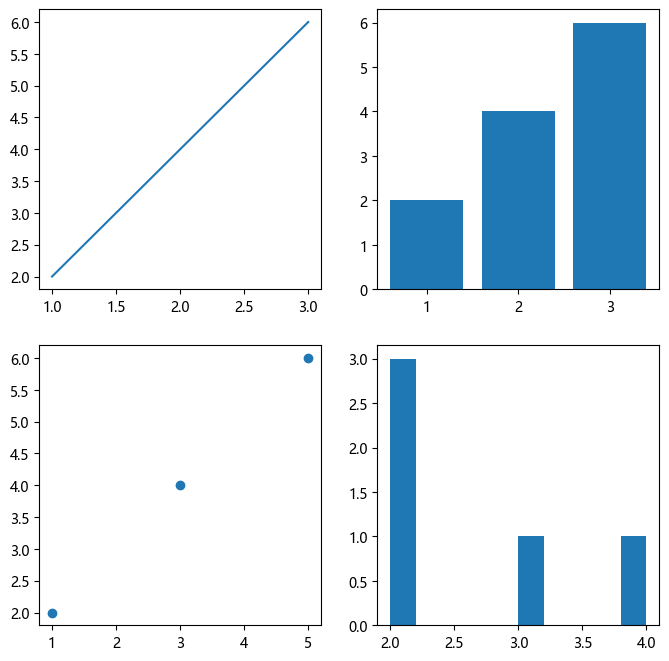

In [24]:
'''plt.subplots(
    ['nrows=1', 'ncols=1', 'sharex=False', 'sharey=False', 'squeeze=True', 'subplot_kw=None', 'gridspec_kw=None', '**fig_kw'],
) 
'''
#以上是subplots的参数，可以用shift+tab键查看

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) 
ax1, ax2, ax3, ax4 = axes.flatten() #将当前展开
ax1.plot([1, 2, 3], [2, 4, 6])     # 绘制第一个子图
ax2.bar([1, 2, 3], [2, 4, 6])      # 绘制第二个子图
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax4.hist([2, 2, 2, 3, 4]);         # 绘制第四个子图

### 8.4 添加横纵轴名称及标题

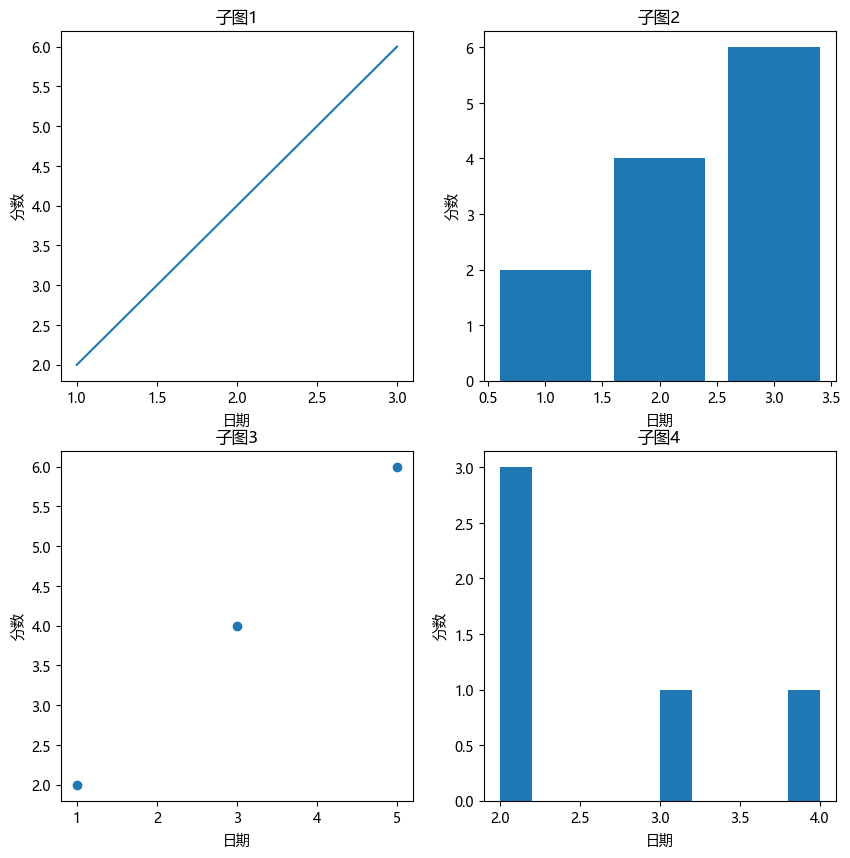

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])     # 绘制第一个子图
ax1.set_title('子图1')
ax1.set_xlabel('日期')
ax1.set_ylabel('分数')
ax2.bar([1, 2, 3], [2, 4, 6])      # 绘制第二个子图
ax2.set_title('子图2')
ax2.set_xlabel('日期')
ax2.set_ylabel('分数')
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax3.set_title('子图3')
ax3.set_xlabel('日期')
ax3.set_ylabel('分数')
ax4.hist([2, 2, 2, 3, 4])         # 绘制第四个子图
ax4.set_title('子图4')
ax4.set_xlabel('日期')
ax4.set_ylabel('分数');

## 9. 随机矩阵画图
这一节讲怎样在matplotlib中打印出图像。这里我们打印出的是纯粹的数字，而非自然图像  
### 9.1 绘制简单随机矩阵图

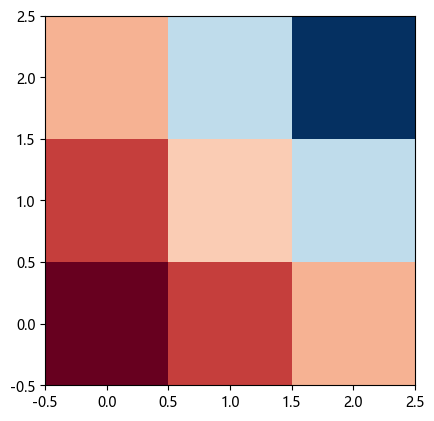

In [26]:
'''
#参数：
plt.imshow(
    ['X', 'cmap=None', 'norm=None', 'aspect=None', 'interpolation=None', 'alpha=None', 'vmin=None', 'vmax=None', 'origin=None', 'extent=None', 'shape=<deprecated parameter>', 'filternorm=1', 'filterrad=4.0', 'imlim=<deprecated parameter>', 'resample=None', 'url=None', '*', 'data=None', '**kwargs'],
)
Docstring:#解释功能
Display an image, i.e. data on a 2D regular raster.
'''

# 首先生成一个 3x3 的 2D-array ，也就是三行三列的格子，array 中的每个值经过colormap与一个颜色对应并填充在格子中
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

plt.imshow(a, #数据
           #画图方式
           interpolation='nearest', #interpolation:插入，插值
           #指定某个colormap值
           cmap='RdBu', 
           #选择原点的位置
           origin='lower')

### 9.2 随机矩阵图添加colorbar

为我们显示不同颜色的区块所对应的具体数值。其中shrink参数可以用来调整 colorbar 的长度，这里我们使colorbar的长度变短为原来的92%  

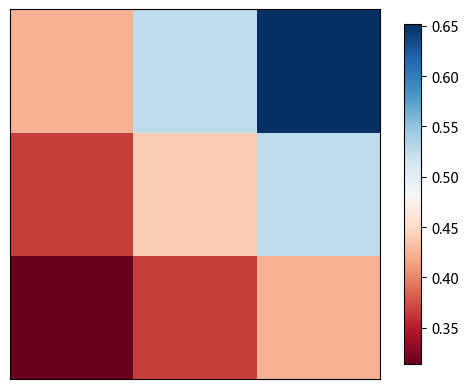

In [27]:
plt.imshow(a, interpolation='nearest', cmap='RdBu', origin='lower')
plt.colorbar(shrink=.92) #shrink:用于调整比例，用于调整色块

plt.xticks(())
plt.yticks(())
plt.show()

## 绘制多个统计图形的组合展示
要求：  
（1）生成两行三列15×10的6个子图；  
（2）第一个子图：  
数据：x=[1, 2, 3]; y=[0.6, 0.8, 0.2];  
图形：设置三种不同颜色，绘制条形图；  
（3）第二个子图：  
绘制sin(x)和cos(x)的图像；  
样式：  
横轴设为'x'，纵轴设为'f(x)'；  
添加图例：sin(x)和cos(x);  
颜色不同，线型不同；  
图形：绘制线图；  
（4）第三个子图：  
数据：x=[1,2,3,4,5,6,7,8]; y= [3,1,4,5,8,9,7,2]  
样式：  
纵轴标签设为：['A','B','C','D','E','F','G','H']  
图形：绘制水平条形图；  
（5）第四个子图：  
生成两组服从正态分布的100个随机数,设为x,y；  
样式：  
颜色主题：采用mpl.cm.RdYlBu；  
标注：采用'o'；  
图形：绘制气泡图；  
（6）第五个子图：  
数据：  
x = np.linspace(0.5,2*np.pi,20)  
y = np.random.randn(20)  
样式：  
棉棒样式：'-.'；  
棉棒末端的样式:'o'；  
指定基线的样式:'-'；  
图形：绘制棉棒图；  
（7）第六个子图：  
数据：  
elements = ["Flour","Sugar","Cream","Strawberry","Nuts"]  
weight1 = [40,15,20,10,15]  
weight2 = [30,25,15,20,10]  
样式：  
颜色设为：["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00"]  
百分数保留一位小数；  
其他参数自行发挥；  
图形：绘制双层环形图；  

([<matplotlib.patches.Wedge at 0x17d74245f90>],
 [Text(-0.44000000000000006, 5.388445916248355e-17, '')])

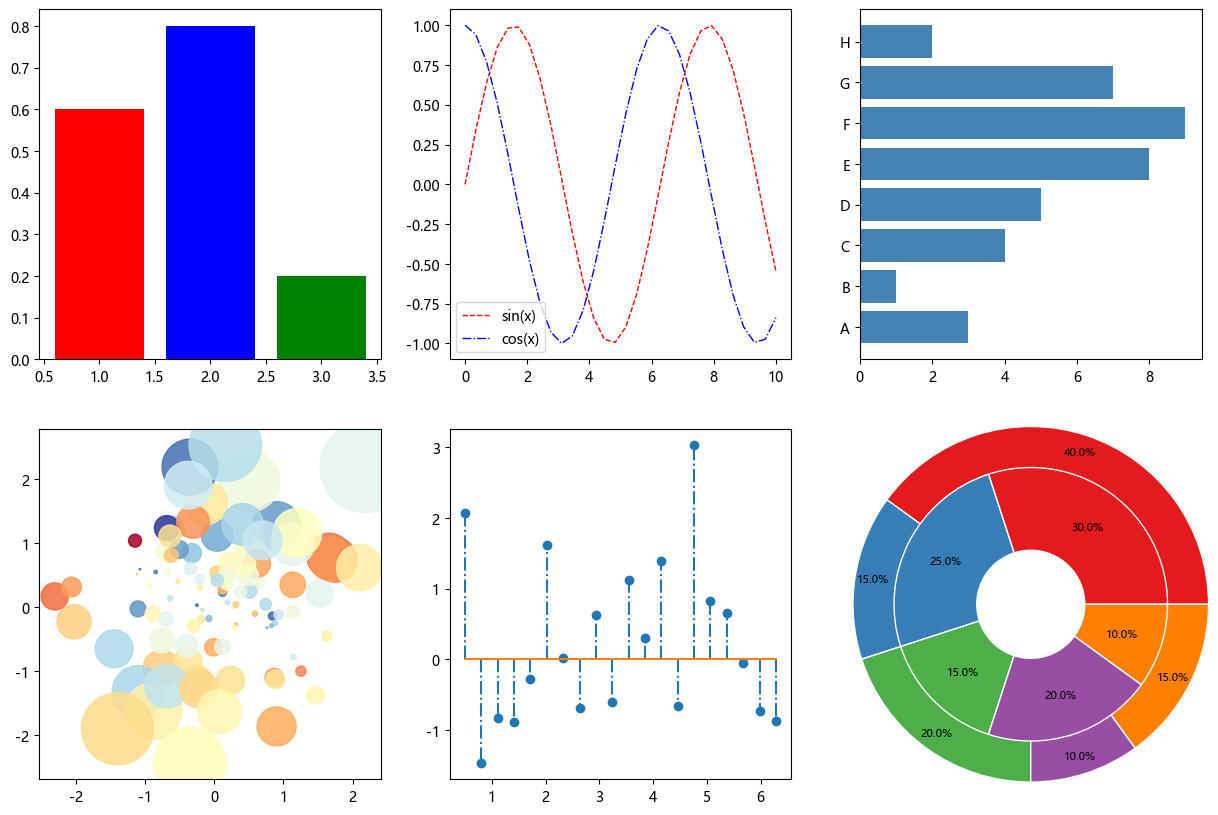

In [28]:
#生成两行三列15×10的6个子图；
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() #将当前展开
#第一个子图
#要求：绘制三种不同的颜色，绘制条形图
ax1.bar([1, 2, 3],[0.6, 0.8, 0.2],color=list('rbg'))

#第二个子图
'''
绘制sin(x)和cos(x)的图像；
样式：
横轴设为'x'，纵轴设为'f(x)'；
添加图例：sin(x)和cos(x);
颜色不同，线型不同；
图形：绘制线图；
'''
x = np.linspace(0, 10, 30)
ax2.plot(x,np.sin(x),color='r',linewidth=1.0,linestyle='--',label='sin(x)')
ax2.plot(x,np.cos(x),color='b',linewidth=1.0,linestyle='-.',label='cos(x)')
ax2.set_xlabel='x'
ax2.set_ylabel='f(x)'
ax2.legend()

#第三个子图
'''
数据：x=[1,2,3,4,5,6,7,8]; y= [3,1,4,5,8,9,7,2]
样式：
纵轴标签设为：['A','B','C','D','E','F','G','H']
图形：绘制水平条形图；
'''
ax3.barh([1,2,3,4,5,6,7,8],[3,1,4,5,8,9,7,2],color='steelblue',tick_label=['A','B','C','D','E','F','G','H'])
ax3.set_yticks([1,2,3,4,5,6,7,8],['A','B','C','D','E','F','G','H'])



#第四个子图
'''
生成两组服从正态分布的100个随机数,设为x,y；
样式：
颜色主题：采用mpl.cm.RdYlBu；
标注：采用'o'；
图形：绘制气泡图；
'''
np.random.seed(1)
x1 = np.random.normal(0,1,100)
y1 = np.random.normal(0,1,100)
colors = np.random.randn(100)
ax4.scatter(x1,y1,
            c = colors,
            s = np.power(10*x1 + 20*y1,2),
            marker = 'o',
            cmap = mpl.cm.RdYlBu,
            alpha = 0.85)

#第五个子图
'''
x = np.linspace(0.5,2*np.pi,20)
y = np.random.randn(20)
样式：
棉棒样式：'-.';
棉棒末端的样式:'o';
指定基线的样式:'-';
图形：绘制棉棒图；
'''
x2 = np.linspace(0.5,2*np.pi,20)
y2 = np.random.randn(20)
ax5.stem(x2,y2,linefmt='-.',markerfmt='o',basefmt='-')#棉棒图

#第六个子图
'''
数据：
elements = ["Flour","Sugar","Cream","Strawberry","Nuts"]
weight1 = [40,15,20,10,15]
weight2 = [30,25,15,20,10]
样式：
颜色设为：["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00"]
百分数保留一位小数；
其他参数自行发挥；
图形：绘制双层环形图；
'''
elements = ["Flour","Sugar","Cream","Strawberry","Nuts"]
weight1 = [40,15,20,10,15]
weight2 = [30,25,15,20,10]
colormapList = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00"]

ax6.pie(weight1,radius=1.3,autopct='%1.1f%%',pctdistance=0.9,colors=colormapList,wedgeprops=dict(edgecolor='w'),textprops={"fontsize":8})
ax6.pie(weight2,radius=1,autopct='%1.1f%%',pctdistance=0.7,colors=colormapList,wedgeprops=dict(edgecolor='w'),textprops={"fontsize":8})
ax6.pie([1],colors='w',radius=0.4)